## Import Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Read Data

In [16]:
stock_ctlt = pd.read_csv('CTLT.csv')
stock_ctlt

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
1,2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2,2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
3,2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
4,2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...,...
1113,2023-06-05,37.720001,38.180000,36.930000,37.799999,37.799999,2585200
1114,2023-06-06,37.910000,39.049999,37.580002,38.820000,38.820000,2261700
1115,2023-06-07,39.160000,40.029999,38.250000,39.959999,39.959999,4382500
1116,2023-06-08,39.700001,39.840000,36.750000,39.000000,39.000000,9705500


## Analyst

### Describe

In [17]:
stock_ctlt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1.118000e+03
mean,80.106726,81.297000,78.808459,80.084571,80.084571,1.444059e+06
std,30.068015,30.365610,29.670188,29.995349,29.995349,1.895211e+06
min,30.049999,30.660000,29.290001,29.840000,29.840000,2.197000e+05
25%,50.942499,51.835001,50.410000,51.352499,51.352499,7.143500e+05
50%,78.270001,79.665001,77.235000,78.630001,78.630001,1.003750e+06
75%,105.937502,107.271254,104.107500,106.032501,106.032501,1.474300e+06
max,142.639999,142.639999,140.779999,142.350006,142.350006,3.083880e+07


### Visualization

#### Histogram

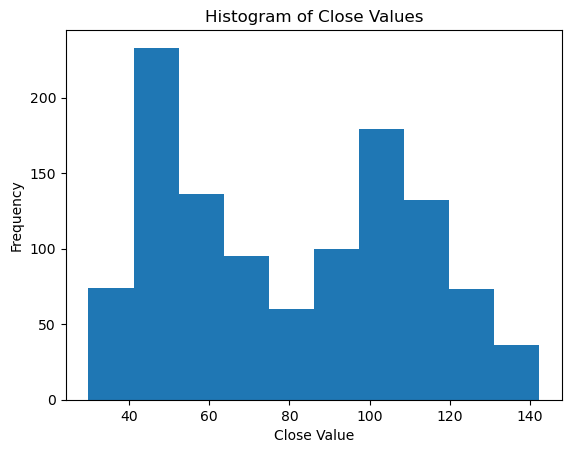

In [18]:
plt.hist(stock_ctlt['Close'])

plt.title("Histogram of Close Values")
plt.xlabel("Close Value")
plt.ylabel("Frequency")

plt.show()

#### Boxplot

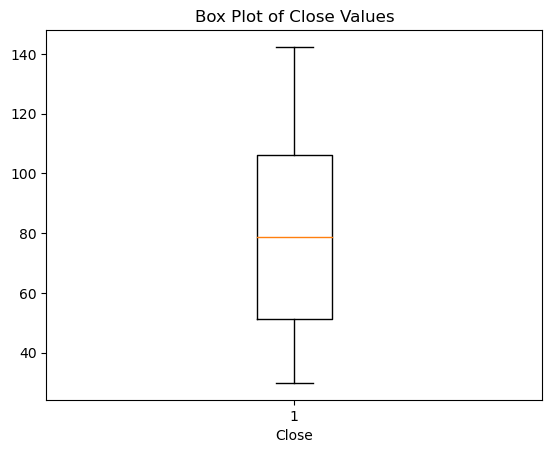

In [19]:
plt.boxplot(stock_ctlt['Close'])

plt.title("Box Plot of Close Values")
plt.xlabel("Close")

plt.show()

#### Visualizing the components of our time series: Trend, Seasonality, and Noise

In [20]:
# Convert the 'Date' column to datetime format
stock_ctlt['Date'] = pd.to_datetime(stock_ctlt['Date'])

# Set the 'Date' column as the index value
stock_ctlt = stock_ctlt.set_index(pd.DatetimeIndex(stock_ctlt['Date'].values))

# Delete Date from Dataframe
stock_ctlt = stock_ctlt.drop('Date', axis=1)

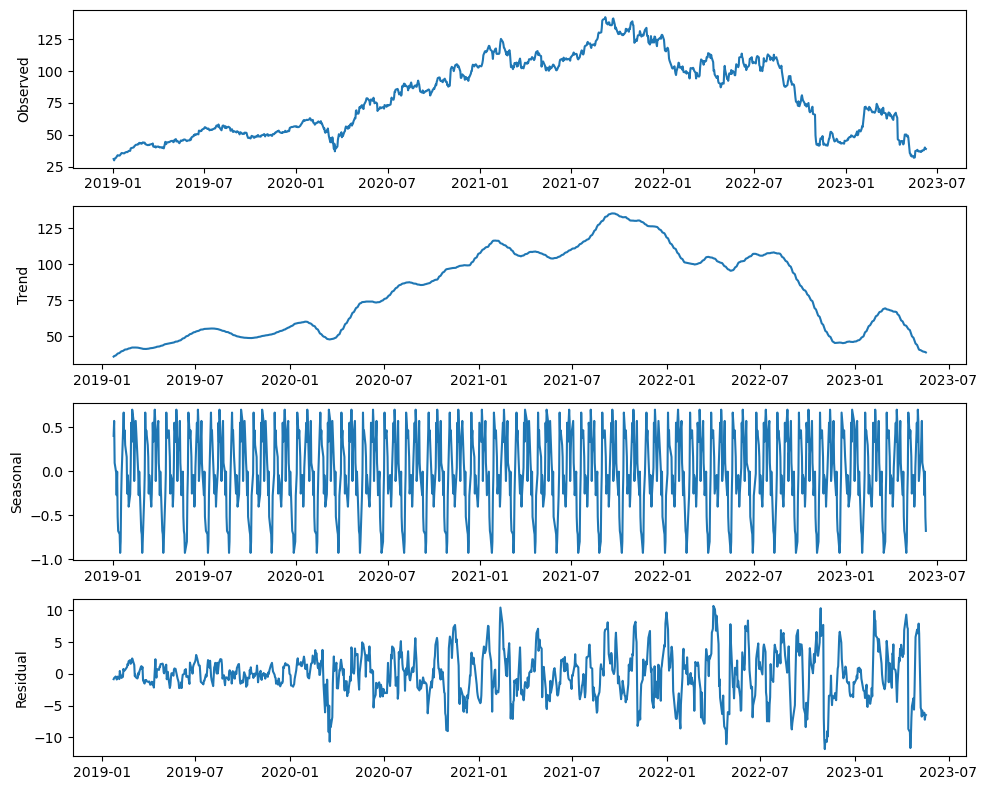

In [21]:
decomposition = sm.tsa.seasonal_decompose(stock_ctlt['Close'], model='add', period=30)

# Plotting the components
fig, ax = plt.subplots(4,1, figsize=(10,8))
ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')
ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

#### Initial Close Values

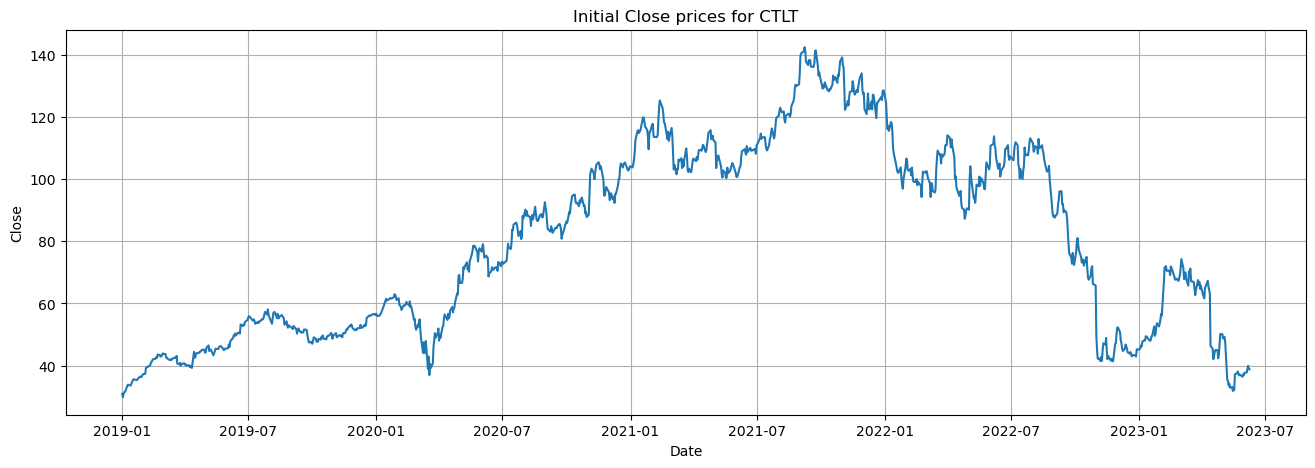

In [22]:
plt.figure(figsize=(16,5))

plt.plot(stock_ctlt.index, stock_ctlt['Close'])

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Initial Close prices for CTLT')
plt.grid()
plt.show()